# 1. Numerical differentiation exercise

In [97]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt
import math
import time
from autograd import grad
from autograd import numpy as anp

### Problem 1

In [98]:
def p1():
    x = sy.symbols('x')
    f_x = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    f_deriv = sy.diff(f_x, x)
    fx = sy.lambdify(x, f_x)
    fd = sy.lambdify(x, f_deriv)
    return fx, fd

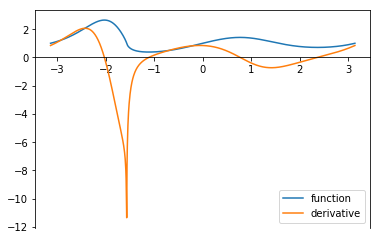

In [99]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
x_points = np.linspace(-np.pi, np.pi, 1000)
fx, fd = p1()
plt.plot(x_points, fx(x_points), label="function")
plt.plot(x_points, fd(x_points), label="derivative")
plt.legend()
plt.show()

### Problem 2

In [100]:
# forward difference quotient
def forward(f, x, h):
    y = (f(x + h) - f(x)) / h
    return y

def forward2(f, x, h):
    y = ((-3) * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
    return y

# backward difference quotient
def backward(f, x, h):
    y = (f(x) - f(x - h)) / h
    return y

def backward2(f, x, h):
    y = (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)
    return y

# centered difference quotient
def centered2(f, x, h):
    y = (f(x + h) - f(x - h)) / (2 * h)
    return y

def centered4(f, x, h):
    y = (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
    return y

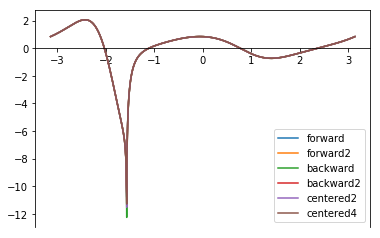

In [101]:
fx, fd = p1()
h = 0.001

plt.clf()
plt.plot(x_points, forward(fx, x_points, h), label='forward')  
plt.plot(x_points, forward2(fx, x_points, h), label='forward2')
plt.plot(x_points, backward(fx, x_points, h), label='backward')
plt.plot(x_points, backward2(fx, x_points, h), label='backward2')  
plt.plot(x_points, centered2(fx, x_points, h), label='centered2')
plt.plot(x_points, centered4(fx, x_points, h), label='centered4')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.legend()
plt.show()

From the graph, we can tell that these six approximations give similar results to Problem 1, and their differences are hard to distinguish. 

### Problem 3

In [102]:
def compute_derivative(fx, fd, x0, h):
    f_1 = fd(x0)
    f_forward = forward(fx, x0, h)
    f_forward2 = forward2(fx, x0, h)
    f_backward = backward(fx, x0, h)
    f_backward2 = backward2(fx, x0, h)
    f_centered2 = centered2(fx, x0, h)
    f_centered4 = centered4(fx, x0, h)
    return f_1, f_forward, f_forward2, f_backward, f_backward2, f_centered2, f_centered4


def p3(x0):
    fx, fd = p1()
    forward_error = []
    forward2_error = []
    backward_error = []
    backward2_error = []
    centered2_error = []
    centered4_error = []
    h_list = np.logspace(-8, 0, 9)
    for h in h_list:
        f_1, f_forward, f_forward2, f_backward, f_backward2, f_centered2, f_centered4 = compute_derivative(fx, fd, x0, h)
        forward_error.append(abs(f_1-f_forward))
        forward2_error.append(abs(f_1-f_forward2))
        backward_error.append(abs(f_1-f_backward))
        backward2_error.append(abs(f_1-f_backward2))
        centered2_error.append(abs(f_1-f_centered2))
        centered4_error.append(abs(f_1-f_centered4))
           
    # plot
    plt.clf()
    plt.loglog(h_list, forward_error, '.-', label='order 1 forward')
    plt.loglog(h_list, forward2_error, '.-', label='order 2 forward')
    plt.loglog(h_list, backward_error, '.-', label='order 1 backward')
    plt.loglog(h_list, backward2_error, '.-', label='order 2 backward')
    plt.loglog(h_list, centered2_error, '.-', label='order 2 centered')
    plt.loglog(h_list, centered4_error, '.-', label='order 4 centered')
    plt.xlabel('h')
    plt.ylabel('absolute error')
    plt.legend()
    plt.show()
    

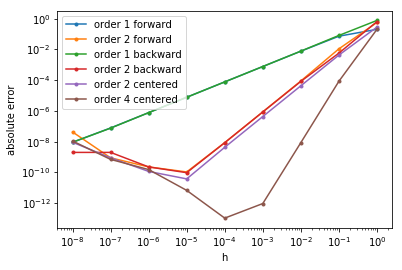

In [103]:
x0 = 1
p3(x0)

### Problem 4

In [104]:
def p4(a, h):
    data = np.load('plane.npy')
    x_y = {}  
    # compute x(t) and y(t) at each given t
    for row in data:
        t = row[0]
        alpha = np.deg2rad(row[1])
        beta = np.deg2rad(row[2])
        x = a * (sy.tan(beta) / (sy.tan(beta) - sy.tan(alpha)))
        y = a * ((sy.tan(beta) * sy.tan(alpha)) / (sy.tan(beta) - sy.tan(alpha)))
        x_y[t] = [x, y]
        
    prime = {}
    for k, v in x_y.items():
        # calculate forward difference quotient for t = 7
        if k == 7:
            x_prime = (x_y[k+h][0] - x_y[k][0]) / h
            y_prime = (x_y[k+h][1] - x_y[k][1]) / h
        elif k == 14:
            # calculate backward difference quotient for t = 14
            x_prime = (x_y[k][0] - x_y[k-h][0]) / h
            y_prime = (x_y[k][1] - x_y[k-h][1]) / h
        else:
            # calculate centered difference quotient for t = 8,..., 13
            x_prime = (x_y[k+h][0] - x_y[k-h][0]) / (2 * h)
            y_prime = (x_y[k+h][1] - x_y[k-h][1]) / (2 * h)
        prime[k] = [x_prime, y_prime]
        
    # calculate the values of the speed at each t
    speed = {}
    for k, v in prime.items():
        s = math.sqrt(v[0] ** 2 + v[1] ** 2)
        speed[k] = s
        
    return speed


In [105]:
a = 500
h = 1  
speed = p4(a, h)   

for k, v in speed.items():
    print("when t = {}, the speed is {}".format(k, v))

when t = 7.0, the speed is 46.42420062213424
when t = 8.0, the speed is 47.001039380952975
when t = 9.0, the speed is 48.998805140368006
when t = 10.0, the speed is 50.09944162965281
when t = 11.0, the speed is 48.29035083820463
when t = 12.0, the speed is 51.56455904927257
when t = 13.0, the speed is 53.92303354505342
when t = 14.0, the speed is 51.51480056963572


### Problem 5

In [106]:
def jacobian_cdq2(funct, x0, h):
    # second order centered difference quotient
    size = len(x0)
    # create the standard basis vector
    e = np.eye(size)
    funct_deriv = []
    x = np.array(x0)
    for j in range(size):
        a1, b1 = x + h * e[j]
        a2, b2 = x - h * e[j]
        d = (np.array(funct(a1, b1)) - np.array(funct(a2, b2))) / (2 * h)
        funct_deriv.append(d)
    return np.array(np.transpose(funct_deriv))  
# Note: I need to calculate the transpose because the vector I get using the given function
# should be a col instead of row (it's partial_f / partial_x).

In [107]:
a = sy.symbols('a')
b = sy.symbols('b')
f2 = np.transpose([a**2, a**3 - b])
f2 = sy.lambdify((a, b), f2)

jacobian_cdq2(f2, (a, b), h)

array([[-(a - 1.0)**2/2 + (a + 1.0)**2/2, 0],
       [-(a - 1.0)**3/2 + (a + 1.0)**3/2, -1.00000000000000]],
      dtype=object)

In [108]:
a = 5
b = 7
h = 0.001
jacobian_cdq2(f2, (a, b), h)

array([[10.      ,  0.      ],
       [75.000001, -1.      ]])

In [109]:
# Check my answer with Sympy
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi
A = np.transpose([rho**2, rho**3 - phi])
X = Matrix(np.transpose([rho**2, rho**3 - phi]))
Y = Matrix([rho, phi])

X.jacobian(Y)

Matrix([
[   2*rho,  0],
[3*rho**2, -1]])

If rho = 5 and phi = 7, then this jacobian matrix becomes [[10, 0], [75, -1]].

Therefore, my function gives the same result as SymPy does.

### Problem 7

In [110]:
g = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))

def experiment(N):
    time_sp = []
    time_dq = []
    time_ag = []
    error_sp = [1e-18] * N
    error_dq = []
    error_ag = []
    for n in range(N):
        x0 = np.random.random()
        t0 = time.clock()
        # exact value
        fx, fd = p1()  # calculate derivation using problem 1's function
        exact = fd(x0)
        t1 = time.clock()
        # fourth-order centered difference quotient
        centered = centered4(fx, x0, 0.0001)  
        t2 = time.clock()
        # Autograd
        dg = grad(g)
        abs_ag = dg(x0)
        t3 = time.clock()
        
        error1 = abs(exact - centered)
        error2 = abs(exact - abs_ag)
        time_sp.append(t1-t0)
        time_dq.append(t2-t1)
        time_ag.append(t3-t2)
        error_dq.append(error1)
        error_ag.append(error2)
   
    plt.clf()
    plt.loglog(time_sp, error_sp, '.', label='SymPy')
    plt.loglog(time_dq, error_dq, '.', label='Difference Quotients')
    plt.loglog(time_ag, error_ag, '.', label='Autograd')
    plt.xlabel('Computation Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()
    

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


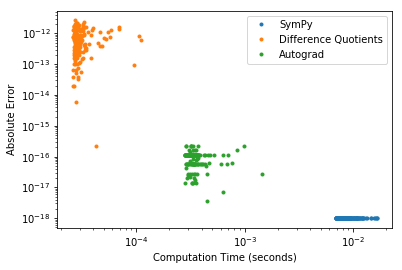

In [111]:
N = 200
experiment(N)